In [1]:
#!pip install --user mlrose

In [178]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


In [3]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [173]:
max_iter = np.linspace(1, 1000, num = 50 , dtype = int)
max_iter

array([   1,   21,   41,   62,   82,  102,  123,  143,  164,  184,  204,
        225,  245,  266,  286,  306,  327,  347,  367,  388,  408,  429,
        449,  469,  490,  510,  531,  551,  571,  592,  612,  633,  653,
        673,  694,  714,  734,  755,  775,  796,  816,  836,  857,  877,
        898,  918,  938,  959,  979, 1000])

- https://towardsdatascience.com/getting-started-with-randomized-optimization-in-python-f7df46babff0
- https://mlrose.readthedocs.io/en/stable/source/fitness.html
- https://mlrose.readthedocs.io/en/stable/source/tutorial1.html#define-a-fitness-function-object

https://mlrose.readthedocs.io/en/stable/source/decay.html#decay
https://mlrose.readthedocs.io/en/stable/source/algorithms.html#algs

# Strengths of Simulated Annealing

## Set up continuos peaks

In [256]:
continuous_peaks = mlrose.ContinuousPeaks(t_pct=0.15)
continuous_peaks_state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
problem_continuous_peaks = mlrose.DiscreteOpt(length = len(continuous_peaks_state), fitness_fn = continuous_peaks, max_val = 2)


## Random Hill Climb 

In [267]:
random_start_time = time.time()
random_best_state, random_best_fitness = mlrose.random_hill_climb(problem_continuous_peaks, 
                                                      max_attempts = 10, max_iters = 1000,
                                                      init_state = continuous_peaks_state, random_state = 2)
random_runtime = time.time() - random_start_time

random_iter_fitness = []
for i in max_iter: 
    random_best_state, random_best_fitness = mlrose.random_hill_climb(problem_continuous_peaks, 
                                                      max_attempts = 10, max_iters = int(i),
                                                      init_state = continuous_peaks_state, random_state = 2)
    random_iter_fitness.append(random_best_fitness)
    

## Simulated Annealing

In [258]:
sa_start_time = time.time()
sa_best_state, sa_best_fitness = mlrose.simulated_annealing(problem_continuous_peaks, 
                                                      max_attempts = 10, max_iters = 1000,
                                                      init_state = continuous_peaks_state, random_state = 2)
sa_runtime = time.time() - sa_start_time

sa_iter_fitness = []
for i in max_iter: 
    sa_best_state, sa_best_fitness = mlrose.simulated_annealing(problem_continuous_peaks, 
                                                      max_attempts = 10, max_iters = int(i),
                                                      init_state = continuous_peaks_state, random_state = 2)
    sa_iter_fitness.append(sa_best_fitness)
    

## Genetic 

In [259]:
gen_start_time = time.time()
gen_best_state, gen_best_fitness = mlrose.genetic_alg(problem_continuous_peaks, max_attempts = 10, max_iters = 1000, random_state = 2)
gen_runtime = time.time() - gen_start_time


gen_iter_fitness = []
for i in max_iter: 
    gen_best_state, gen_best_fitness = mlrose.genetic_alg(problem_continuous_peaks, 
                                                          max_attempts = 10, max_iters = 1000, 
                                                          random_state = 2)

    gen_iter_fitness.append(gen_best_fitness)
    

## MIMIC

In [260]:
mimic_start_time = time.time()
mimic_best_state, mimic_best_fitness = mlrose.mimic(problem_continuous_peaks, max_attempts = 10, max_iters = 1000)
mimic_runtime = time.time() - mimic_start_time

mimic_iter_fitness = []
for i in max_iter: 
    mimic_best_state, mimic_best_fitness = mlrose.mimic(problem_continuous_peaks,
                                                        max_attempts = 10, max_iters = 1000,
                                                        random_state = 1)


    mimic_iter_fitness.append(mimic_best_fitness)

## Iteration Comparsion

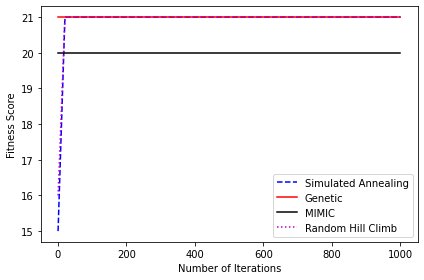

In [268]:
plt.plot(max_iter, sa_iter_fitness, '--', color="b",  label="Simulated Annealing")
plt.plot(max_iter, gen_iter_fitness, color="r",  label="Genetic")
plt.plot(max_iter, mimic_iter_fitness, color="k",  label="MIMIC")
plt.plot(max_iter, random_iter_fitness, linestyle = 'dotted', color="m",  label="Random Hill Climb")

plt.title("")
plt.xlabel("Number of Iterations")
plt.ylabel("Fitness Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Runtime Comparison

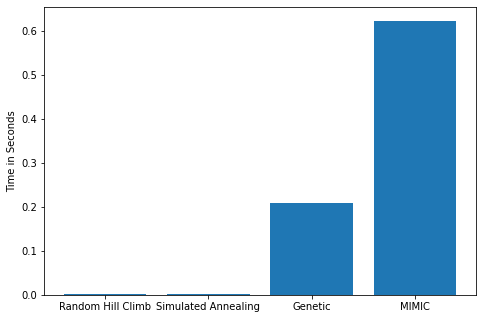

In [262]:
optimizer = ['Random Hill Climb', 'Simulated Annealing', 'Genetic', 'MIMIC']
runtime = [random_runtime, sa_runtime, gen_runtime, mimic_runtime]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(optimizer,runtime)
plt.ylabel("Time in Seconds") 
plt.show()


# Strengths of Genetic Algorithm


## Set up One Max Problem 

In [270]:
one_max1 = mlrose.OneMax()
one_max_init_state = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
problem_one_max = mlrose.DiscreteOpt(length = len(one_max_init_state1), fitness_fn = one_max)


## Random Hill Climb

In [272]:
random_start_time1 = time.time()
random_best_state1, random_best_fitness1 = mlrose.random_hill_climb(problem_one_max, 
                                                      max_attempts = 10, max_iters = 1000,
                                                      init_state = one_max_init_state, random_state = 2)
random_runtime1 = time.time() - random_start_time1

random_iter_fitness1 = []
for i in max_iter: 
    random_best_state1, random_best_fitness1 = mlrose.random_hill_climb(problem_one_max, 
                                                      max_attempts = 10, max_iters = int(i),
                                                      init_state = one_max_init_state, random_state = 2)
    random_iter_fitness1.append(random_best_fitness1)
    

## Simulated Annealing

In [273]:
sa_start_time1 = time.time()
sa_best_state1, sa_best_fitness1 = mlrose.simulated_annealing(problem_one_max, 
                                                      max_attempts = 10, max_iters = 1000,
                                                      init_state = one_max_init_state, random_state = 2)
sa_runtime1 = time.time() - sa_start_time1

sa_iter_fitness1 = []
for i in max_iter: 
    sa_best_state1, sa_best_fitness1 = mlrose.simulated_annealing(problem_one_max, 
                                                      max_attempts = 10, max_iters = int(i),
                                                      init_state = one_max_init_state, random_state = 2)
    sa_iter_fitness1.append(sa_best_fitness1)
    

## Genetic Algorithm

In [275]:
gen_start_time1= time.time()
gen_best_state1, gen_best_fitness1 = mlrose.genetic_alg(problem_one_max, max_attempts = 10, max_iters = 1000, random_state =2)
gen_runtime1 = time.time() - gen_start_time1


gen_iter_fitness1 = []
for i in max_iter: 
    gen_best_state1, gen_best_fitness1 = mlrose.genetic_alg(problem_one_max, max_attempts = 10, max_iters = int(i), random_state = 2)

    gen_iter_fitness1.append(gen_best_fitness1)
    

## MIMIC

In [277]:
mimic_start_time1 = time.time()
mimic_best_state1, mimic_best_fitness1 = mlrose.mimic(problem_one_max, max_attempts = 10, max_iters = 1000, random_state = 2)
mimic_runtime1 = time.time() - mimic_start_time1

mimic_iter_fitness1 = []
for i in max_iter: 
    mimic_best_state1, mimic_best_fitness1 = mlrose.mimic(problem_one_max, max_attempts = 10,max_iters = int(i), random_state = 2)


    mimic_iter_fitness1.append(mimic_best_fitness1)

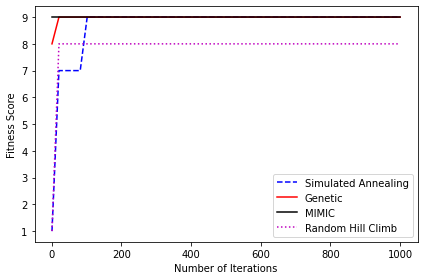

In [278]:
plt.plot(max_iter, sa_iter_fitness1, '--', color="b",  label="Simulated Annealing")
plt.plot(max_iter, gen_iter_fitness1, color="r",  label="Genetic")
plt.plot(max_iter, mimic_iter_fitness1, color="k",  label="MIMIC")
plt.plot(max_iter, random_iter_fitness1, linestyle = 'dotted', color="m",  label="Random Hill Climb")

plt.title("")
plt.xlabel("Number of Iterations")
plt.ylabel("Fitness Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

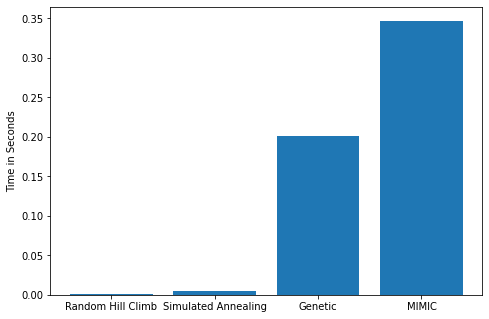

In [279]:
optimizer = ['Random Hill Climb', 'Simulated Annealing', 'Genetic', 'MIMIC']
runtime = [random_runtime1, sa_runtime1, gen_runtime1, mimic_runtime1]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(optimizer,runtime)
plt.ylabel("Time in Seconds") 
plt.show()


# Strengths of MIMIC

## Set Up Knapsack

In [314]:
weights = [10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5]
max_weight_pct = 0.6
knapsack = mlrose.Knapsack(weights, values, max_weight_pct)
knapsack_init_state = np.array([1, 0, 1, 1, 0])

problem_knapsack = mlrose.DiscreteOpt(length = 5, fitness_fn = knapsack)


## Random Hill Climb

In [315]:
random_start_time2 = time.time()
random_best_state2, random_best_fitness2 = mlrose.random_hill_climb(problem_knapsack, 
                                                      max_attempts = 10, max_iters = 1000,
                                                      init_state = knapsack_init_state, random_state = 2)
random_runtime2 = time.time() - random_start_time2

random_iter_fitness2 = []
for i in max_iter: 
    random_best_state2, random_best_fitness2 = mlrose.random_hill_climb(problem_knapsack, 
                                                      max_attempts = 10, max_iters = int(i),
                                                      init_state = knapsack_init_state, random_state = 2)
    random_iter_fitness2.append(random_best_fitness2)
    

## Simulated Annealing 

In [316]:
sa_start_time2 = time.time()
sa_best_state2, sa_best_fitness2 = mlrose.simulated_annealing(problem_knapsack, 
                                                      max_attempts = 10, max_iters = 1000,
                                                      init_state = knapsack_init_state, random_state = 2)
sa_runtime2 = time.time() - sa_start_time2

sa_iter_fitness2 = []
for i in max_iter: 
    sa_best_state, sa_best_fitness = mlrose.simulated_annealing(problem_knapsack, 
                                                      max_attempts = 10, max_iters = int(i),
                                                      init_state = knapsack_init_state, random_state = 2)
    sa_iter_fitness2.append(sa_best_fitness2)
    

In [317]:
sa_best_state

array([0, 1, 1, 1, 0])

## Genetic

In [306]:
gen_start_time2 = time.time()
gen_best_state2, gen_best_fitness2 = mlrose.genetic_alg(problem_knapsack, max_attempts = 10, max_iters = 1000, random_state = 2)
gen_runtime2 = time.time() - gen_start_time2


gen_iter_fitness2 = []
for i in max_iter: 
    gen_best_state2, gen_best_fitness2 = mlrose.genetic_alg(problem_knapsack, max_attempts = 10, max_iters = int(i), random_state = 2)

    gen_iter_fitness2.append(gen_best_fitness2)
    

In [307]:
gen_best_state2

array([0, 1, 1, 0, 1])

## MIMIC

In [308]:
mimic_start_time2 = time.time()
mimic_best_state2, mimic_best_fitness2 = mlrose.mimic(problem_knapsack, max_attempts = 10, max_iters = 1000, random_state = 2)
mimic_runtime2 = time.time() - mimic_start_time2

mimic_iter_fitness2 = []
for i in max_iter: 
    mimic_best_state2, mimic_best_fitness2 = mlrose.mimic(problem_knapsack, max_attempts = 10,max_iters = int(i), random_state = 2)


    mimic_iter_fitness2.append(mimic_best_fitness2)

In [309]:
mimic_best_state2

array([0, 1, 1, 0, 1])

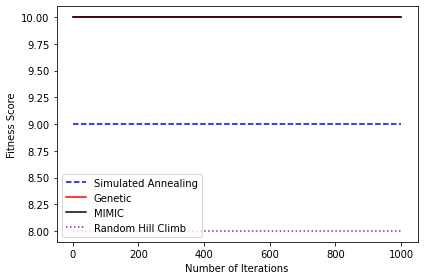

In [318]:
plt.plot(max_iter, sa_iter_fitness2, '--', color="b",  label="Simulated Annealing")
plt.plot(max_iter, gen_iter_fitness2, color="r",  label="Genetic")
plt.plot(max_iter, mimic_iter_fitness2, color="k",  label="MIMIC")
plt.plot(max_iter, random_iter_fitness2, linestyle = 'dotted', color="m",  label="Random Hill Climb")

plt.title("")
plt.xlabel("Number of Iterations")
plt.ylabel("Fitness Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

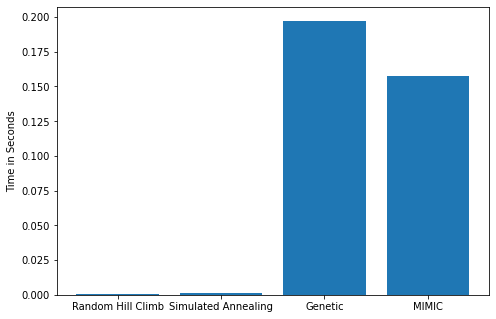

In [319]:
optimizer = ['Random Hill Climb', 'Simulated Annealing', 'Genetic', 'MIMIC']
runtime = [random_runtime2, sa_runtime2, gen_runtime2, mimic_runtime2]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(optimizer,runtime)
plt.ylabel("Time in Seconds") 
plt.show()
